# ASSIGNMENT NO 4

NAME - HARSHADA VILAS DANDGE
ROLL NO - 3213
SUB - DSBD

PROBLEM STATEMENT -
Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset.The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [19]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [22]:
#preprocessing the dataset
#check for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [23]:
df.shape

(506, 14)

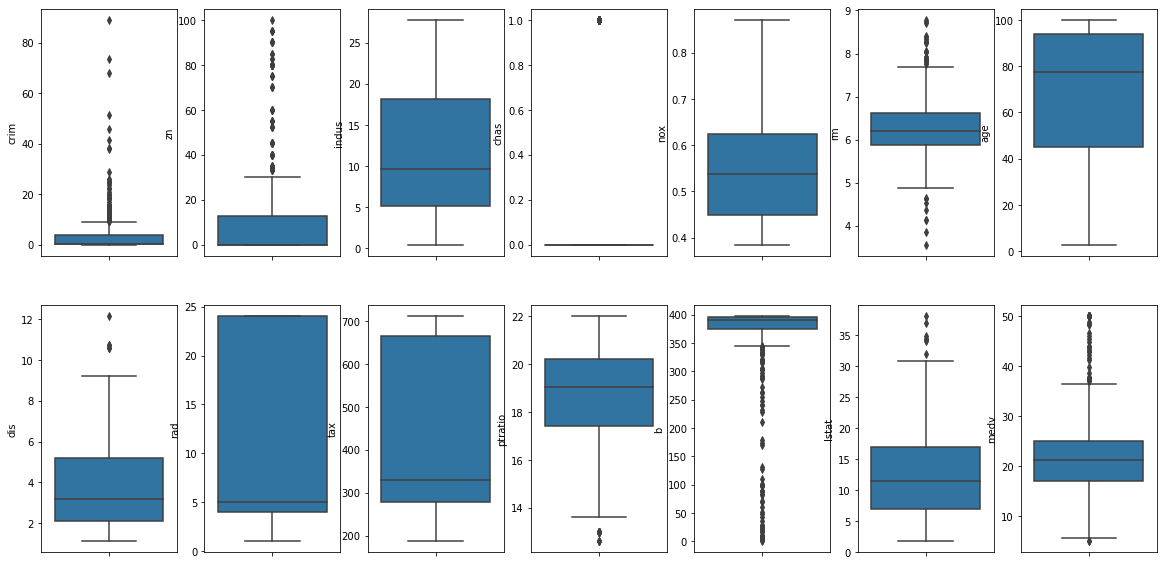

In [24]:
#Exploratory Data Analysis
#create box plots
fig, ax = plt.subplots(ncols=7, nrows=2 , figsize = (20,10))
index = 0
ax = ax.flatten()

for col, values in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index +=1

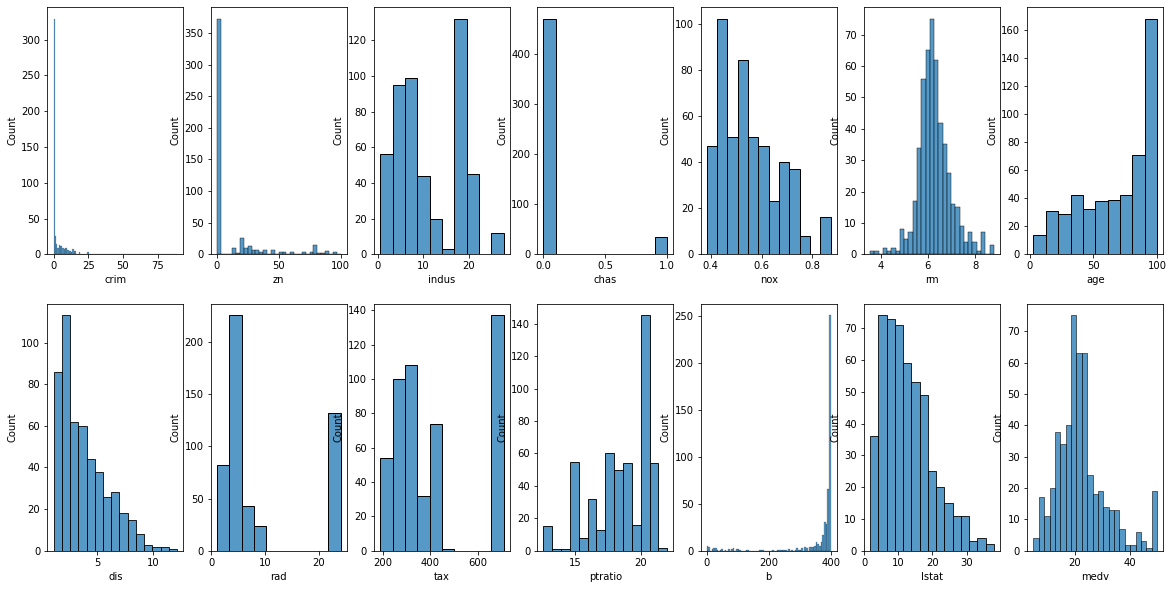

In [26]:
# create hist plot
fig, ax = plt.subplots(ncols=7, nrows=2 , figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value, ax=ax[index])
    index +=1

In [27]:
#min-max normalization
cols = ['crim','zn','tax','b']
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

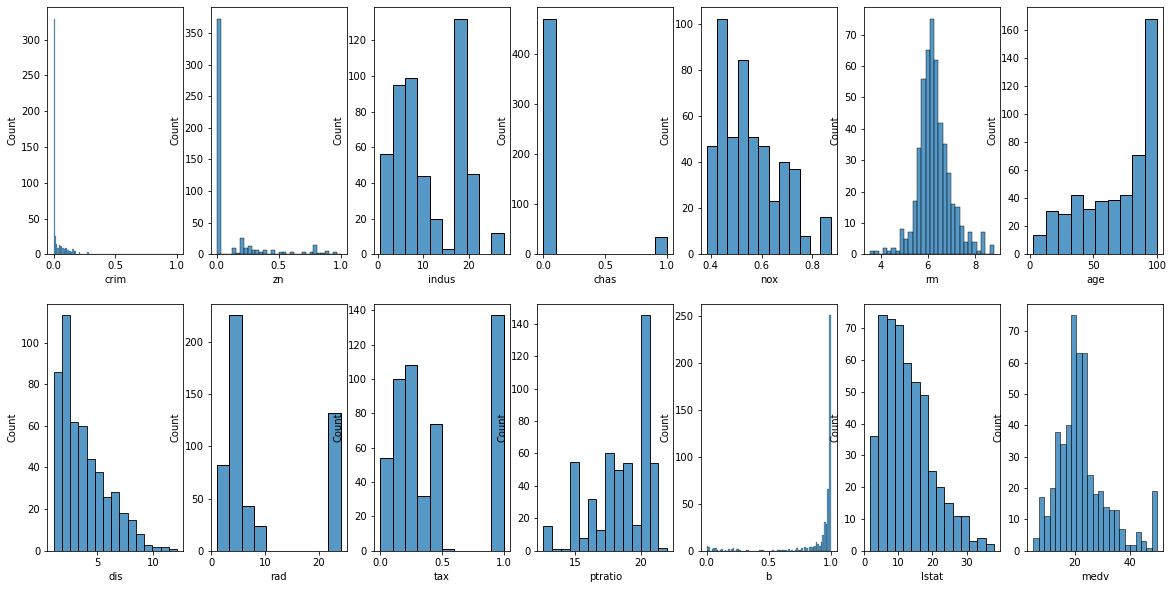

In [29]:
# create hist plot
fig, ax = plt.subplots(ncols=7, nrows=2 , figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value, ax=ax[index])
    index +=1

In [30]:
#standardiztion 
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

#fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns = cols)
scaled_cols.head()

,crim,zn,tax,b
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [31]:
for col in cols:
    df[col] = scaled_cols[col]

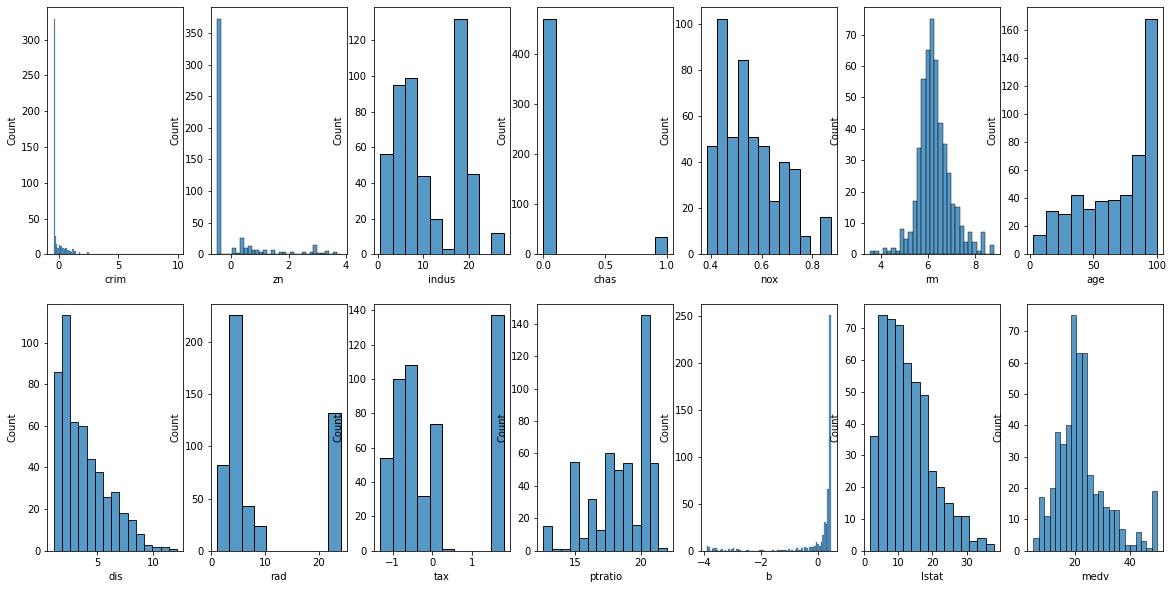

In [33]:
fig, ax = plt.subplots(ncols=7, nrows=2 , figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value, ax=ax[index])
    index +=1

<AxesSubplot:>

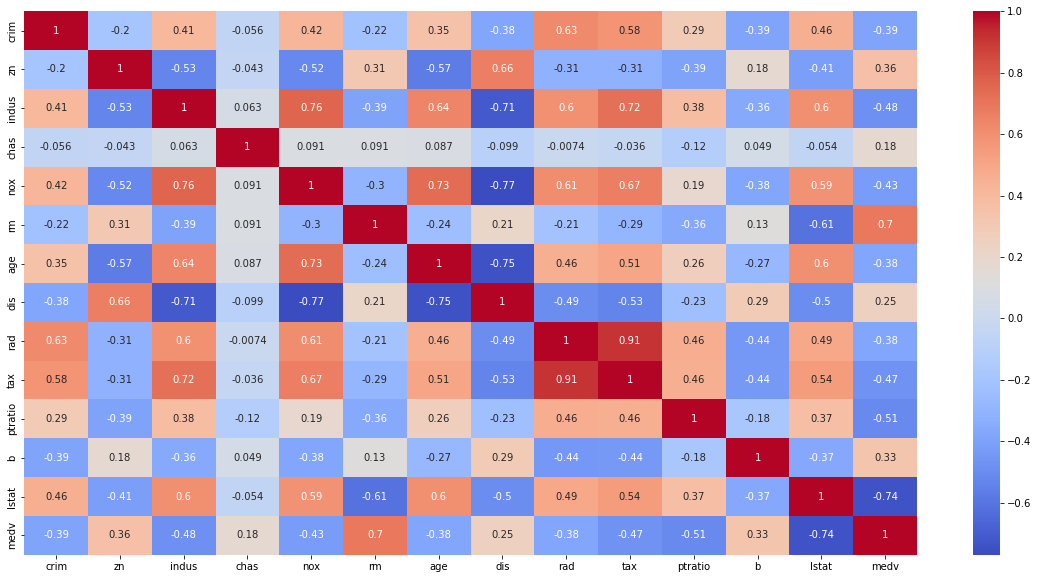

In [34]:
#Correlation Matrix
corr = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')

<AxesSubplot:xlabel='lstat', ylabel='medv'>

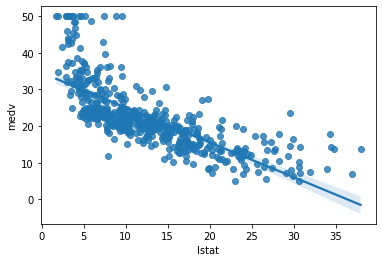

In [35]:
sns.regplot(y=df['medv'], x=df['lstat'])

<AxesSubplot:xlabel='rm', ylabel='medv'>

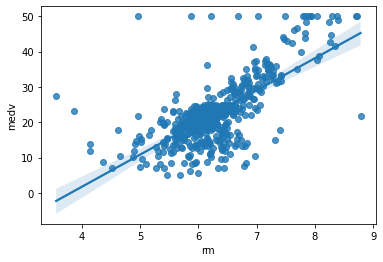

In [36]:
sns.regplot(y=df['medv'], x=df['rm'])

In [37]:
#input split
X = df.drop(columns=['medv','rad'],axis=1)
y = df['medv']

In [38]:
#training the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 7)

In [39]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [40]:
#train score
train_score = round(regression.score(x_train, y_train)*100,2)
print('Train score of Linear Regression:', train_score)

Train score of Linear Regression: 76.09


In [41]:
y_pred = regression.predict(x_test)

In [42]:
from sklearn.metrics import r2_score
score = round(r2_score(y_test, y_pred)*100,2)
print("r_2 score", score)

r_2 score 55.82


In [43]:
round(regression.score(x_test, y_test)*100, 2)

55.82

In [44]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Variance': y_test- y_pred})

In [45]:
df1.head()

,Actual,Predicted,Variance
357,21.7,22.610373,-0.910373
337,18.5,18.541715,-0.041715
327,22.2,19.856924,2.343076
13,20.4,19.722095,0.677905
418,8.8,7.075673,1.724327


In [46]:
df.head(14)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,2.31,0,0.538,6.575,65.2,4.0900,1,-0.666608,15.3,0.441052,4.98,24.0
1,-0.417339,-0.487722,7.07,0,0.469,6.421,78.9,4.9671,2,-0.987329,17.8,0.441052,9.14,21.6
2,-0.417342,-0.487722,7.07,0,0.469,7.185,61.1,4.9671,2,-0.987329,17.8,0.396427,4.03,34.7
3,-0.416750,-0.487722,2.18,0,0.458,6.998,45.8,6.0622,3,-1.106115,18.7,0.416163,2.94,33.4
4,-0.412482,-0.487722,2.18,0,0.458,7.147,54.2,6.0622,3,-1.106115,18.7,0.441052,5.33,36.2
5,-0.417044,-0.487722,2.18,0,0.458,6.430,58.7,6.0622,3,-1.106115,18.7,0.410571,5.21,28.7
6,-0.410243,0.048772,7.87,0,0.524,6.012,66.6,5.5605,5,-0.577519,15.2,0.426798,12.43,22.9
7,-0.403696,0.048772,7.87,0,0.524,6.172,96.1,5.9505,5,-0.577519,15.2,0.441052,19.15,27.1
8,-0.395935,0.048772,7.87,0,0.524,5.631,100.0,6.0821,5,-0.577519,15.2,0.328448,29.93,16.5
9,-0.400729,0.048772,7.87,0,0.524,6.004,85.9,6.5921,5,-0.577519,15.2,0.329325,17.10,18.9
